In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_raw = pd.read_csv('data.csv')
real_data = pd.read_csv('real_data.csv')

In [4]:
data = pd.DataFrame(columns=['T', 'h1', 'h2', 'P', 'l', 'heat'])
data[['T', 'h1', 'h2', 'heat']] = data_raw[['T', 'h1', 'h2', 'heat']]
data['P'] = (data['h1'] - data['h2']) * 10
data['l'] = data['h1'] + data['h2']

data_heat = data[data['heat'] == 1]
data_cold = data[data['heat'] == 0]
dh = 0.005
dl = dh * np.sqrt(2)
dP = dl * 10
dT = 0.01
T0 = 273.16

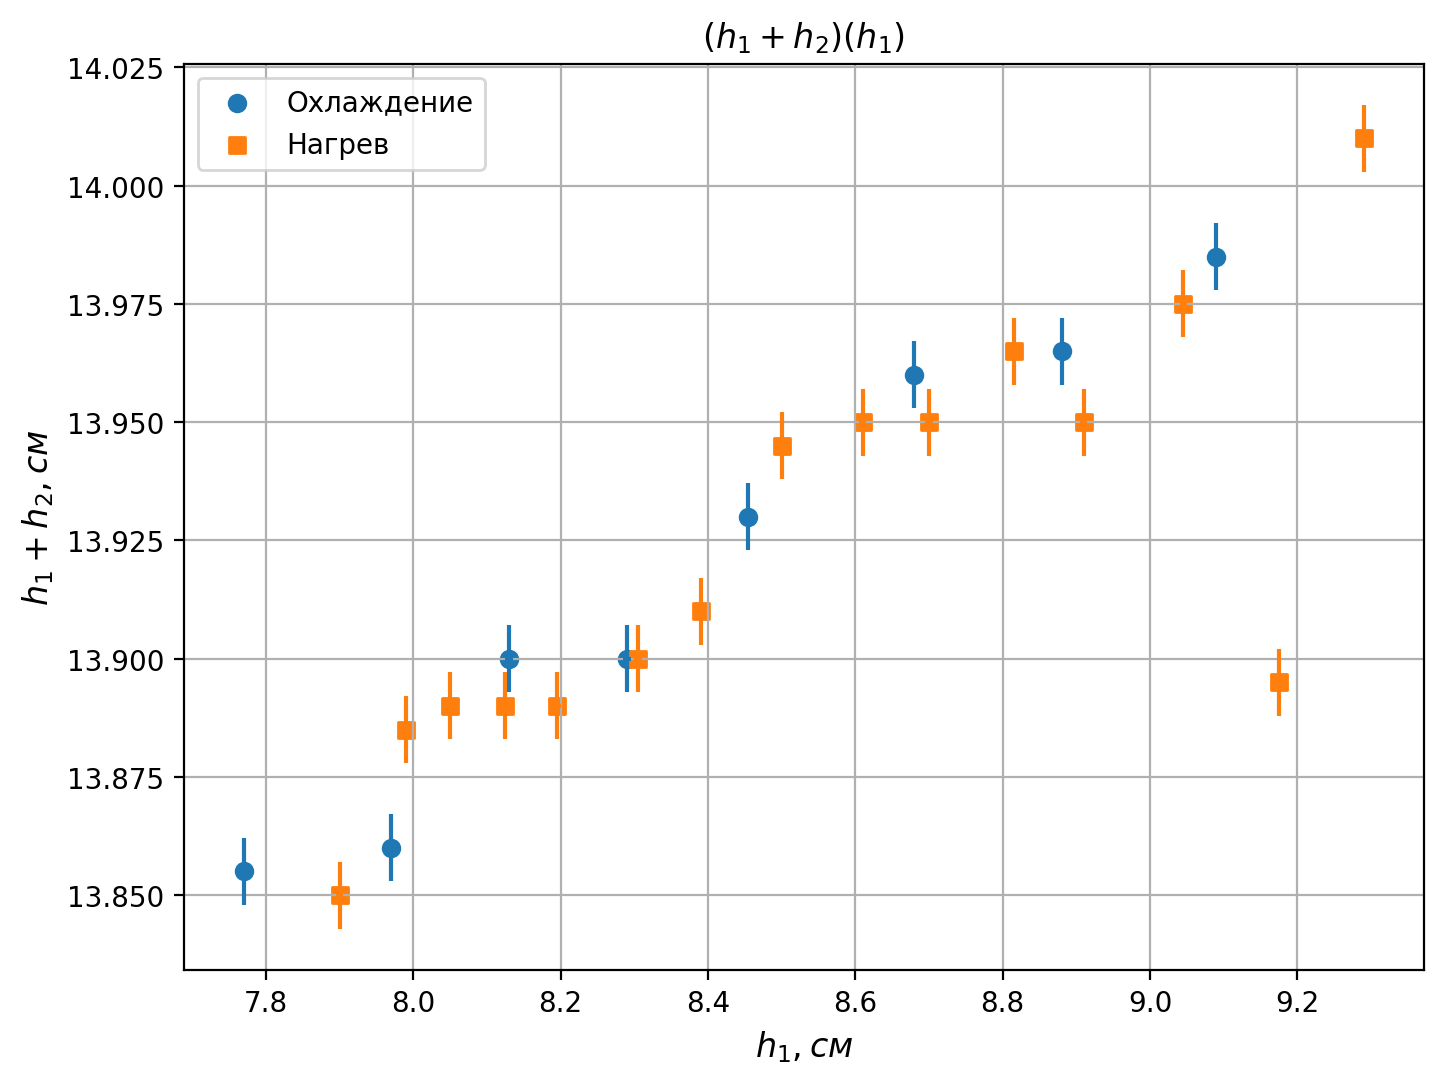

In [6]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"$(h_1 + h_2) (h_1)$")
plt.xlabel(r"$h_1, см$", fontsize=12)
plt.ylabel(r"$h_1 + h_2, см$", fontsize=12)

plt.scatter(data_cold['h1'], data_cold['l'], label="Охлаждение")
plt.errorbar(data_cold['h1'], data_cold['l'], xerr=dh, yerr=dl, linestyle='')

plt.scatter(data_heat['h1'], data_heat['l'], label="Нагрев", marker='s')
plt.errorbar(data_heat['h1'], data_heat['l'], xerr=dh, yerr=dl, linestyle='')

plt.legend()
plt.savefig('../pictures/H(h).png')

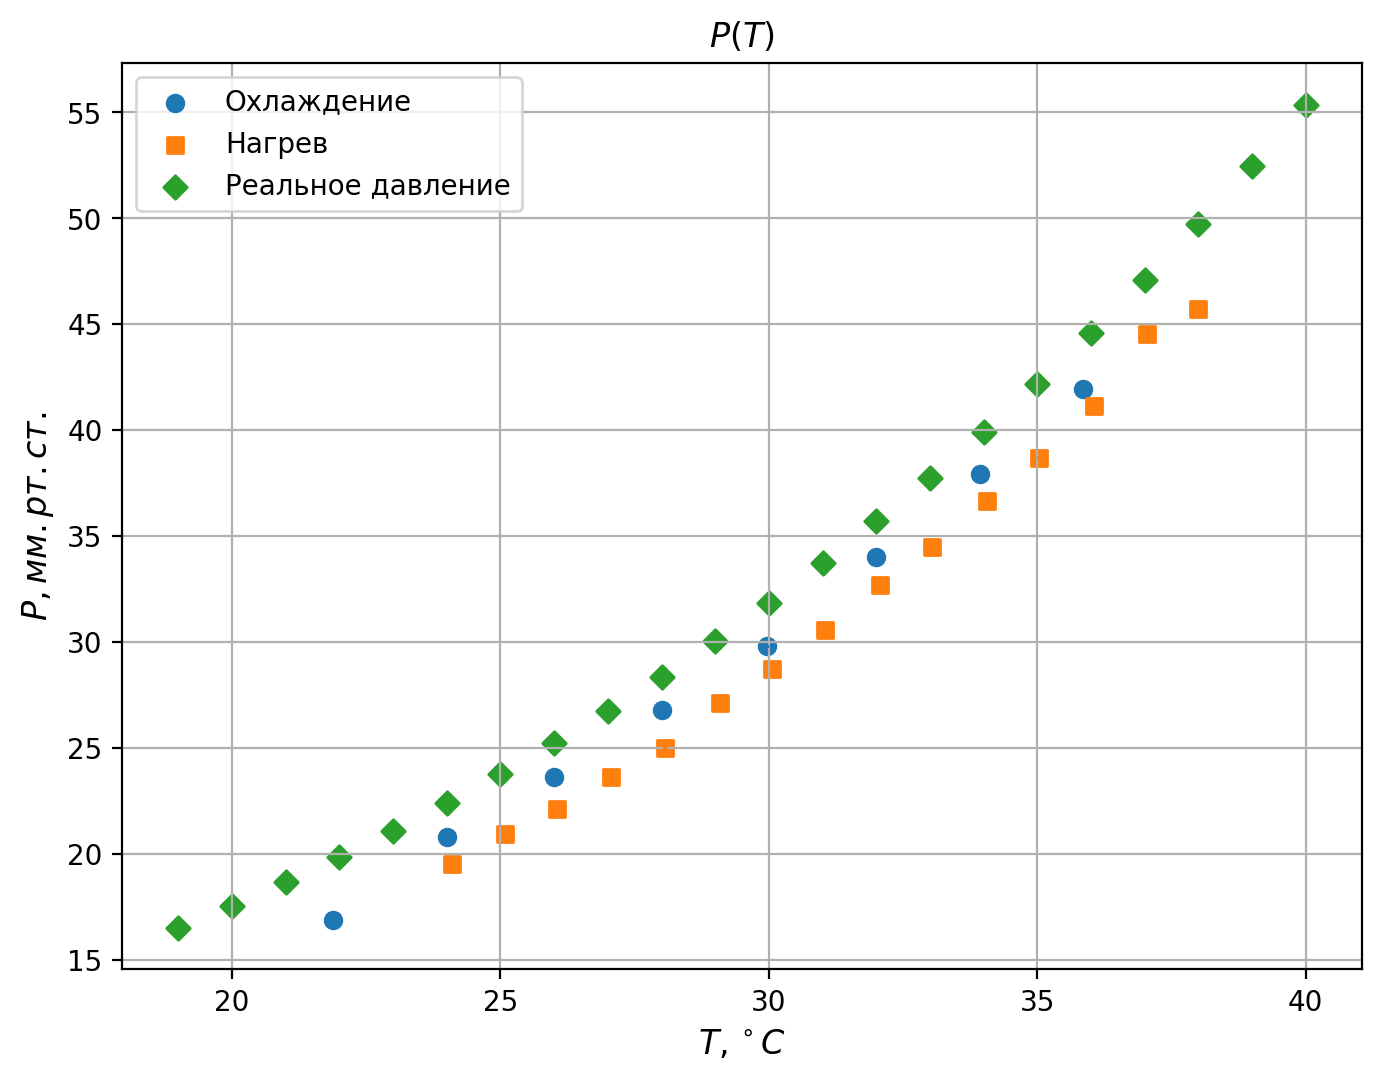

In [7]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"$P(T)$")
plt.xlabel(r"$T, ^\circ C$", fontsize=12)
plt.ylabel(r"$P, мм. рт. ст.$", fontsize=12)

plt.scatter(data_cold['T'], data_cold['P'], label='Охлаждение')
plt.errorbar(data_cold['T'], data_cold['P'], yerr=dP, linestyle='')

plt.scatter(data_heat['T'], data_heat['P'], label='Нагрев', marker='s')
plt.errorbar(data_heat['T'], data_heat['P'], yerr=dP, linestyle='')

plt.scatter(real_data['T'], real_data['P'], marker='D', label='Реальное давление')


plt.legend()
plt.savefig('../pictures/P(T).png')

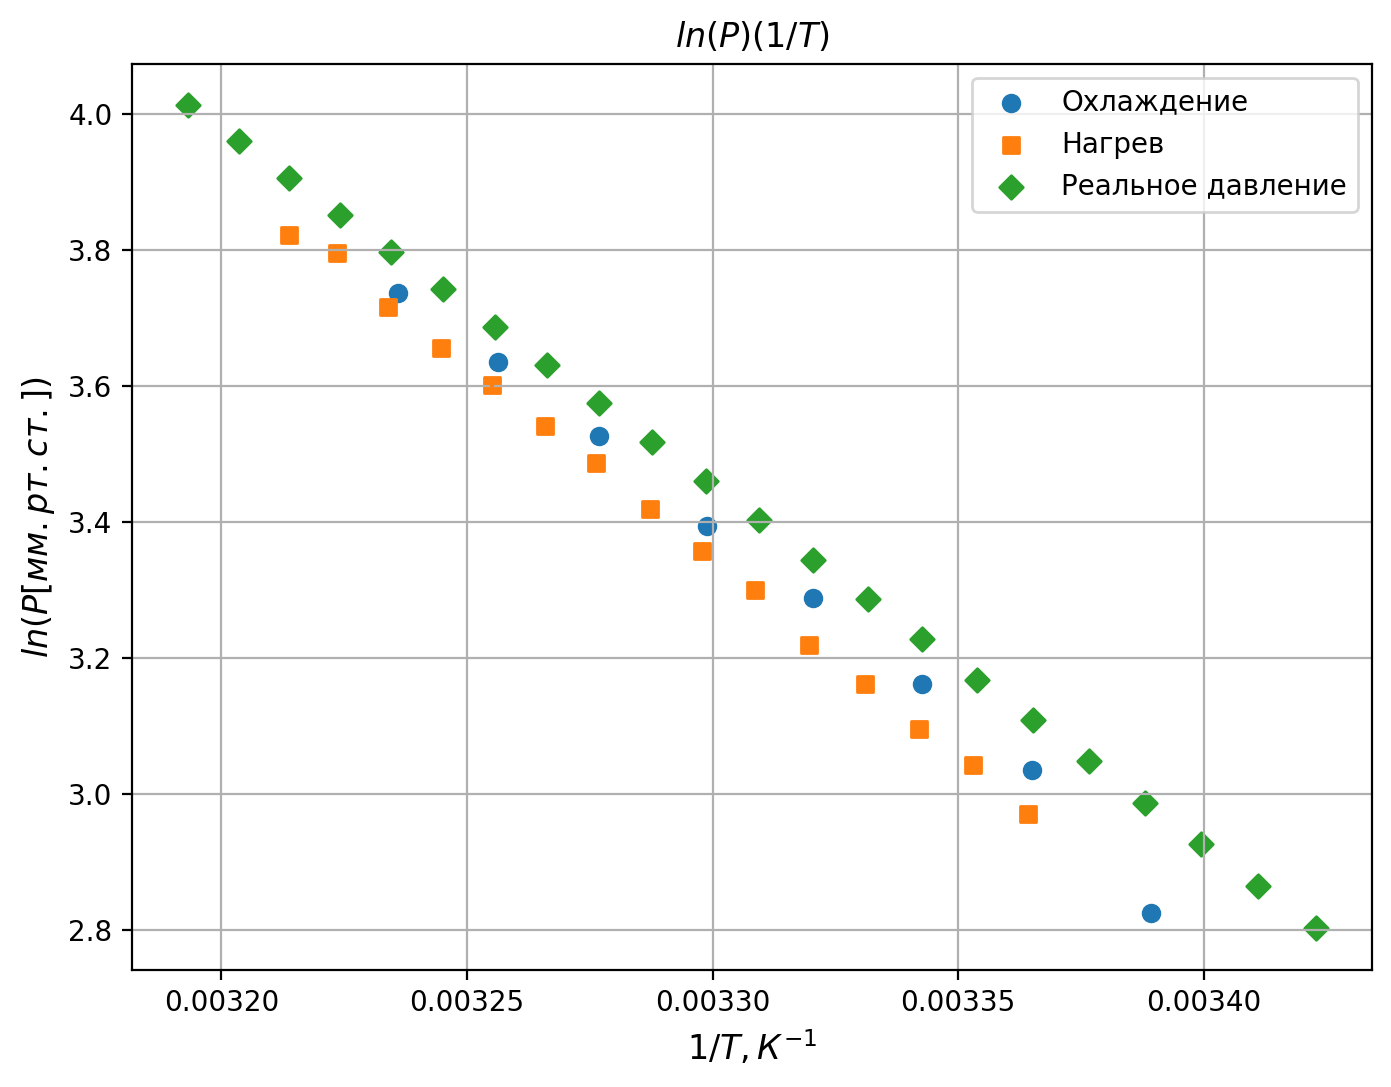

In [8]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"$ln(P)(1/T)$")
plt.xlabel(r"$1/T, К^{-1}$", fontsize=12)
plt.ylabel(r"$ln(P[мм. рт. ст.])$", fontsize=12)

X = 1 / (data['T'].to_numpy() + T0)
Y = np.log(data['P'].to_numpy())
mask = (data['heat'] == 1).to_numpy()


dX = X * X * dT
dY = dP / data['P'].to_numpy()

plt.scatter(X[~mask], Y[~mask], label='Охлаждение')
plt.errorbar(X[~mask], Y[~mask], xerr=dX[~mask], yerr=dY[~mask], linestyle='')

plt.scatter(X[mask], Y[mask], label='Нагрев', marker='s')
plt.errorbar(X[mask], Y[mask], xerr=dX[mask], yerr=dY[mask], linestyle='')

X_real = 1 / (real_data['T'].to_numpy() + T0)
Y_real = np.log(real_data['P'].to_numpy())

plt.scatter(X_real, Y_real, marker='D', label='Реальное давление')

plt.legend()
plt.savefig('../pictures/lnP.png')

blue -5778.6394221883875 +- 364.49658123324343 22.456824516730258 += 1.206887199049356
orange -5748.381197865481 +- 89.16538274081832 22.311839604453468 += 0.2931864010309878
green -5279.208498354402 +- 6.054406362897621 20.873710348583266 += 0.020017183368092106


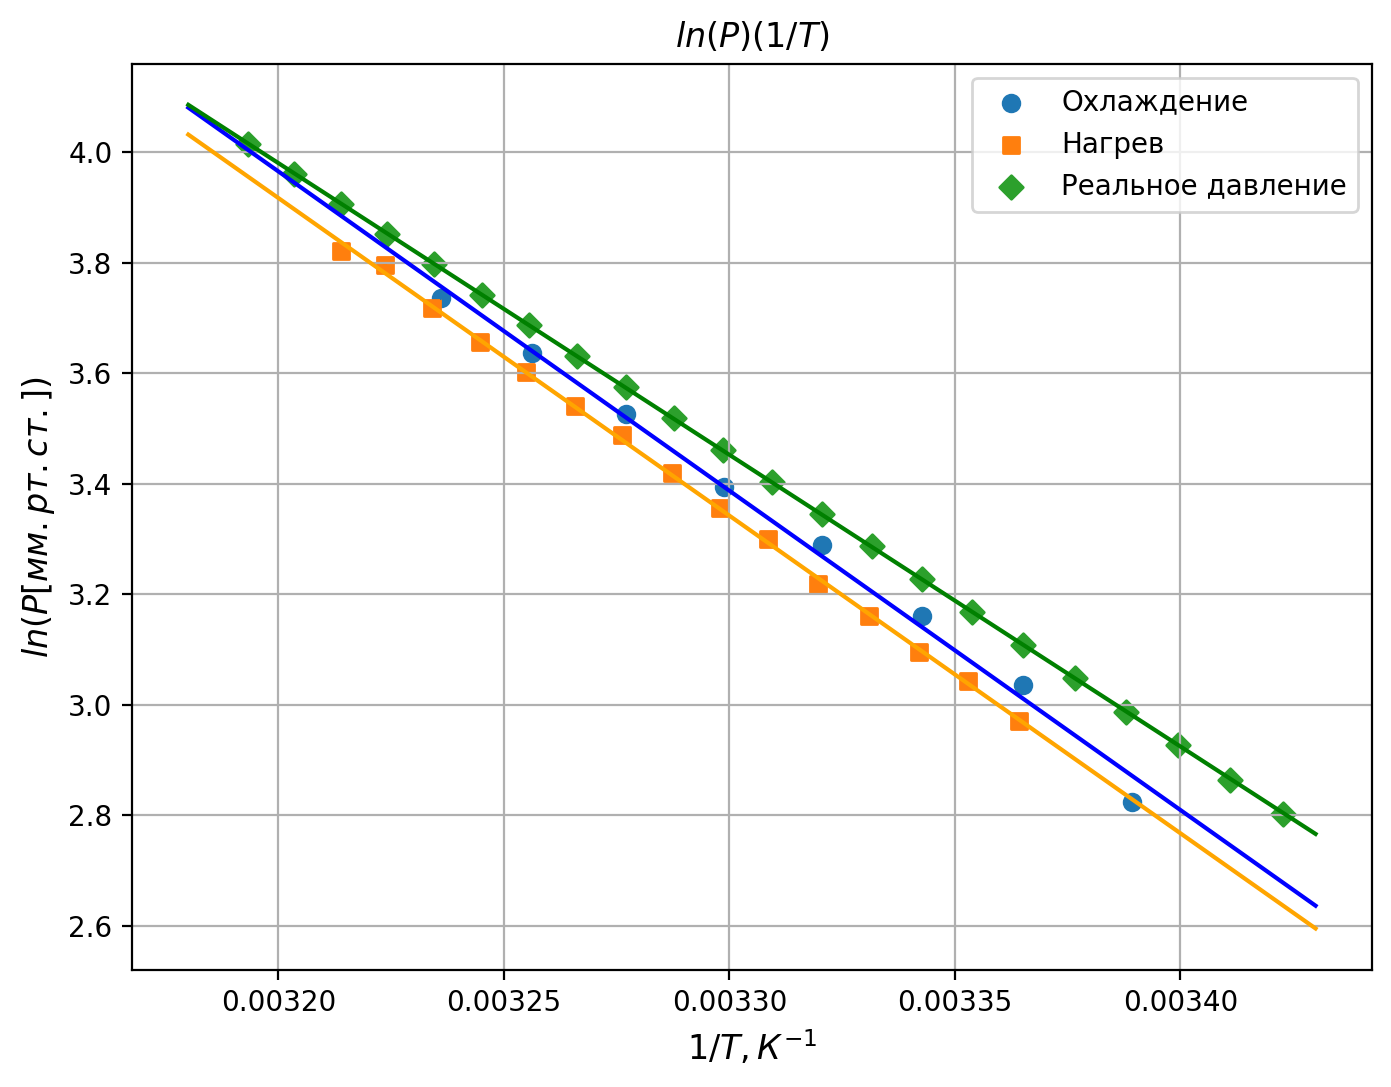

In [9]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"$ln(P)(1/T)$")
plt.xlabel(r"$1/T, К^{-1}$", fontsize=12)
plt.ylabel(r"$ln(P[мм. рт. ст.])$", fontsize=12)

x_min = 0.00318
x_max = 0.00343
x_mm = np.array([x_min, x_max])


X = 1 / (data['T'].to_numpy() + T0)
Y = np.log(data['P'].to_numpy())
mask = (data['heat'] == 1).to_numpy()


dX = X * X * dT
dY = dP / data['P'].to_numpy()

plt.scatter(X[~mask], Y[~mask], label='Охлаждение')
plt.errorbar(X[~mask], Y[~mask], xerr=dX[~mask], yerr=dY[~mask], linestyle='')
a, b = np.polyfit(X[~mask], Y[~mask], deg=1)

S_x = np.std(X[~mask]) ** 2
S_y = np.std(Y[~mask]) ** 2
a_err = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X[~mask]) - 2))
b_err = a_err * np.sqrt(np.mean(X[~mask]**2))
plt.plot(x_mm, a*x_mm + b, color='blue')
print("blue", f'{a} +- {a_err}', f'{b} += {b_err}')

plt.scatter(X[mask], Y[mask], label='Нагрев', marker='s')
plt.errorbar(X[mask], Y[mask], xerr=dX[mask], yerr=dY[mask], linestyle='')
a, b = np.polyfit(X[mask], Y[mask], deg=1)

S_x = np.std(X[mask]) ** 2
S_y = np.std(Y[mask]) ** 2
a_err = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X[mask]) - 2))
b_err = a_err * np.sqrt(np.mean(X[mask]**2))
plt.plot(x_mm, a*x_mm + b, color='orange')
print("orange", f'{a} +- {a_err}', f'{b} += {b_err}')

X_real = 1 / (real_data['T'].to_numpy() + T0)
Y_real = np.log(real_data['P'].to_numpy())

plt.scatter(X_real, Y_real, marker='D', label='Реальное давление')
a, b = np.polyfit(X_real, Y_real, deg=1)

S_x = np.std(X_real) ** 2
S_y = np.std(Y_real) ** 2
a_err = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X_real) - 2))
b_err = a_err * np.sqrt(np.mean(X_real**2))
plt.plot(x_mm, a*x_mm + b, color='green')
print("green", f'{a} +- {a_err}', f'{b} += {b_err}')

plt.legend()
plt.savefig('../pictures/lnP.png')